In [69]:
import astropy.units as u
import matplotlib.pyplot as plt

import pint.fitter
from pint.models import get_model_and_toas
from pint.models.spindown import Spindown
from pint.residuals import Residuals
import pint.logging
from pint.models import (
    parameter as p,
)

pint.logging.setup(level="INFO")

4

In [70]:
parfile= "J1709-4429.par"
timfile= "J1709-4429.tim"

m, t_all = get_model_and_toas(parfile, timfile)
m

INFO     (pint.toa                      ): Using CLOCK = TT(TAI), so setting include_bipm = False


TimingModel(
  AbsPhase(
    MJDParameter(   TZRMJD              57778.8453682432610186 (d) frozen=True),
    strParameter(   TZRSITE             mo                frozen=True),
    floatParameter( TZRFRQ              835.062012        (MHz) frozen=True)),
  AstrometryEquatorial(
    MJDParameter(   POSEPOCH            57600.0000000000000000 (d) frozen=True),
    floatParameter( PX                  0.0               (mas) frozen=True),
    AngleParameter( RAJ                 17:09:42.62494630 (hourangle) +/- 0h00m00.051919s frozen=False),
    AngleParameter( DECJ                -44:29:12.95895000 (deg) +/- 0d00m01.2382s frozen=False),
    floatParameter( PMRA                0.0               (mas / yr) frozen=True),
    floatParameter( PMDEC               0.0               (mas / yr) frozen=True)),
  DispersionDM(
    floatParameter( DM                  75.69             (pc / cm3) frozen=True),
    floatParameter( DM1                 UNSET,
    MJDParameter(   DMEPOCH             5760

In [71]:
display(m.components["Spindown"].params)

['F0', 'PEPOCH', 'F1']

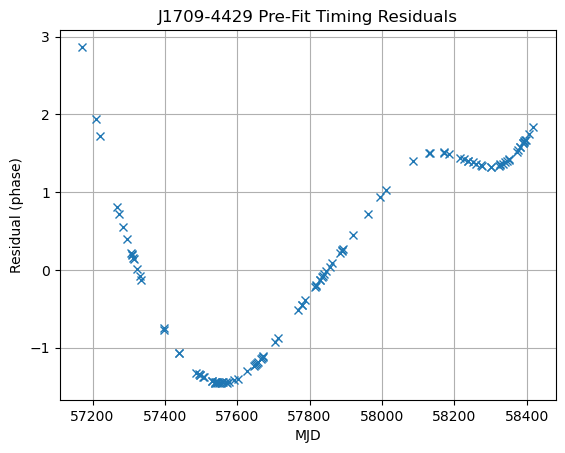

In [72]:
rs = Residuals(t_all, m).phase_resids
xt = t_all.get_mjds()
plt.figure()
plt.plot(xt, rs, "x")
plt.title(f"{m.PSR.value} Pre-Fit Timing Residuals")
plt.xlabel("MJD")
plt.ylabel("Residual (phase)")
plt.grid()

In [73]:
t_all.print_summary()

Number of TOAs:  114
Number of commands:  2
Number of observatories: 1 ['most']
MJD span:  57171.607 to 58418.203
Date span: 2015-05-29 14:34:14.982631331 to 2018-10-27 04:51:49.845290701
most TOAs (114):
  Min freq:      833.739 MHz
  Max freq:      840.233 MHz
  Min error:     51.5 us
  Max error:     1.27e+03 us
  Median error:  161 us



In [54]:
print(t_all[:80].get_mjds())

[57171.60711785 57210.50596524 57220.57158326 57268.37506196
 57274.33428624 57284.41047385 57294.39568448 57307.35328939
 57308.2993345  57309.33190923 57312.26910054 57313.13849207
 57322.349224   57330.26039976 57334.22083118 57396.06254663
 57397.21623365 57438.03171329 57439.02267932 57486.91143249
 57494.76215589 57495.75708942 57496.77575926 57505.66631748
 57506.74618086 57528.76157249 57530.78580178 57537.81887169
 57538.82740111 57539.70939026 57540.74270599 57543.79756413
 57544.65751668 57547.65740699 57550.67835318 57555.51157267
 57558.4053103  57560.42242002 57569.68078646 57572.38796012
 57578.37349245 57591.41134056 57601.40018684 57628.2373572
 57646.32626456 57648.37453443 57652.30277681 57655.38068771
 57658.46081446 57665.14722095 57667.24515593 57671.34458052
 57672.4741868  57703.94671738 57712.02034683 57767.91792327
 57778.84097003 57778.84536365 57787.82360801 57814.74759937
 57817.74584137 57817.75056947 57827.73204832 57829.72766418
 57833.77439663 57836.702

In [56]:

t = t_all[:80]
t.print_summary()



Number of TOAs:  80
Number of commands:  2
Number of observatories: 1 ['most']
MJD span:  57171.607 to 58130.993
Date span: 2015-05-29 14:34:14.982631331 to 2018-01-12 23:49:38.446314827
most TOAs (80):
  Min freq:      833.739 MHz
  Max freq:      840.233 MHz
  Min error:     51.5 us
  Max error:     1.27e+03 us
  Median error:  240 us



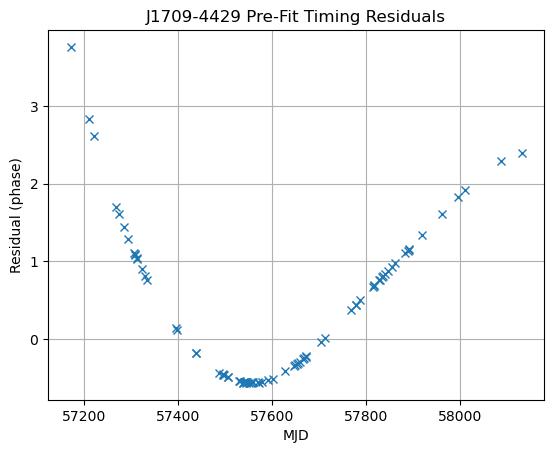

In [57]:
rs = Residuals(t, m).phase_resids
xt = t.get_mjds()
plt.figure()
plt.plot(xt, rs, "x")
plt.title(f"{m.PSR.value} Pre-Fit Timing Residuals")
plt.xlabel("MJD")
plt.ylabel("Residual (phase)")
plt.grid()

In [58]:
f = pint.fitter.WLSFitter(t, m)
f.fit_toas()

WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\pint\utils.py:2597 DegeneracyWarning: Parameter degeneracy found in designmatrix! The offending parameters are ['GLPH_1', 'GLF0_1', 'GLF1_1', 'GLF0D_1', 'GLTD_1'].
WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\pint\fitter.py:2183 DegeneracyWarning: Parameter degeneracy; the following linear combination yields almost no change: 1.0*GLTD_1
WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\pint\fitter.py:2183 DegeneracyWarning: Parameter degeneracy; the following linear combination yields almost no change: 1.0*GLF0D_1
WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\pint\fitter.py:2183 DegeneracyWarning: Parameter degeneracy; the following linear combination yields almost no change: 1.0*GLF1_1
WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\pint\fitter.py:2183 DegeneracyWarning: Parameter degeneracy; the follo

592837.5664991811

WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\pint\fitter.py:2183 DegeneracyWarning: Parameter degeneracy; the following linear combination yields almost no change: 1.0*GLPH_1
WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\pint\fitter.py:2197 RuntimeWarning: invalid value encountered in divide


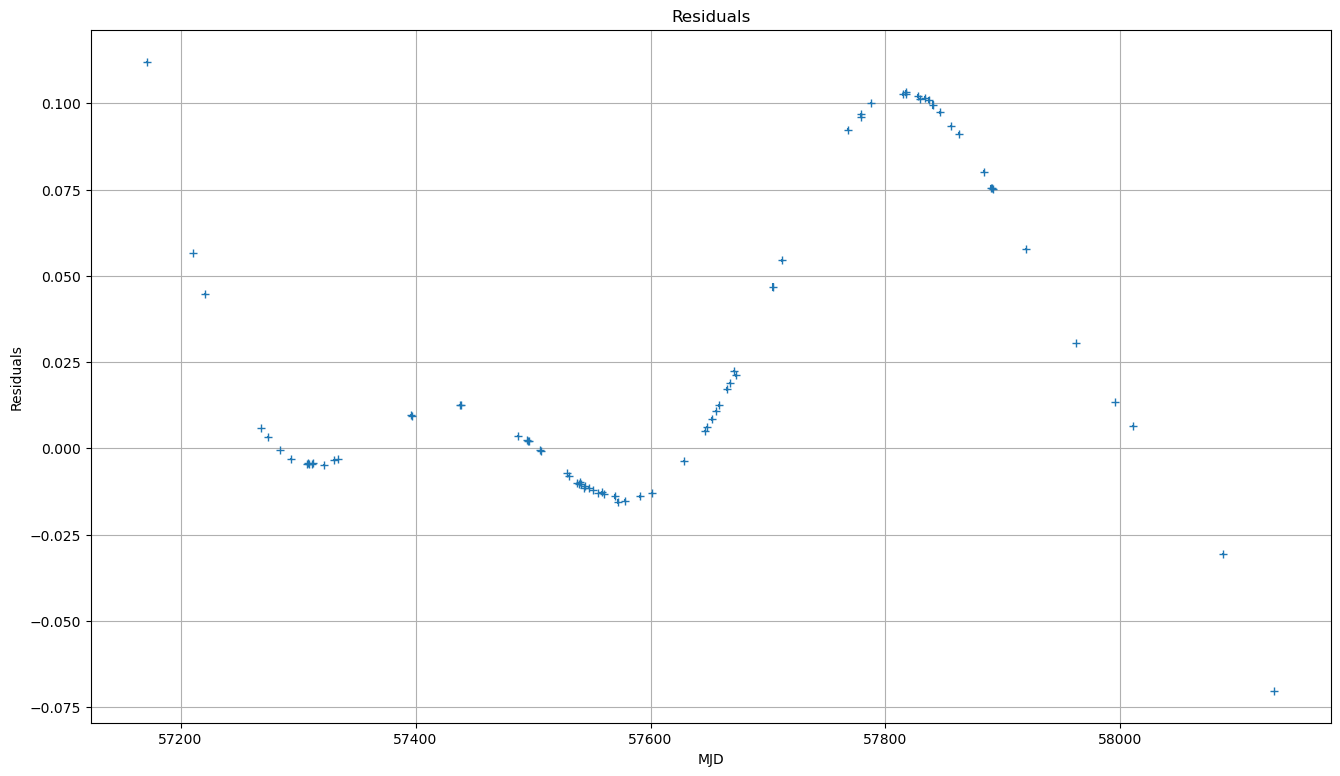

In [59]:
f.plot()

In [60]:
f.print_summary()


Fitted model using weighted_least_square method with 9 free parameters to 80 TOAs
Prefit residuals Wrms = 93804.18061855662 us, Postfit residuals Wrms = 22703.61160201046 us
Chisq = 592837.566 for 70 d.o.f. for reduced Chisq of 8469.108

PAR                   Prefit                  Postfit            Units
============== ==================== ============================ =====
PSR                      J1709-4429 J1709-4429                   None
TRACK                            -2 -2                           None
EPHEM                         DE430 DE430                        None
CLOCK                       TT(TAI) TT(TAI)                      None
UNITS                           TDB TDB                          None
START                       57171.6                      57171.6 d 
FINISH                      58393.3                        58131 d 
DILATEFREQ                        N                              None
DMDATA                            N                             

In [61]:
f2 = p.prefixParameter(
    parameter_type="float",
    name="F2",
    value=0.0,
    units=u.Hz / (u.s) ** 2,
    longdouble=True,
)

In [62]:
m.components["Spindown"].add_param(f2, setup=True)


In [63]:
m.F2.quantity = ((3.*(m.F1.value**2))/m.F0.value) * u.Hz / u.s**2
m.F2.frozen= False

In [64]:
m.validate()

m

TimingModel(
  AbsPhase(
    MJDParameter(   TZRMJD              57778.8453682432610186 (d) frozen=True),
    strParameter(   TZRSITE             mo                frozen=True),
    floatParameter( TZRFRQ              835.062012        (MHz) frozen=True)),
  AstrometryEquatorial(
    MJDParameter(   POSEPOCH            57600.0000000000000000 (d) frozen=True),
    floatParameter( PX                  0.0               (mas) frozen=True),
    AngleParameter( RAJ                 17:09:42.62494630 (hourangle) +/- 0h00m00.051919s frozen=False),
    AngleParameter( DECJ                -44:29:12.95895000 (deg) +/- 0d00m01.2382s frozen=False),
    floatParameter( PMRA                0.0               (mas / yr) frozen=True),
    floatParameter( PMDEC               0.0               (mas / yr) frozen=True)),
  DispersionDM(
    floatParameter( DM                  75.69             (pc / cm3) frozen=True),
    floatParameter( DM1                 UNSET,
    MJDParameter(   DMEPOCH             5760

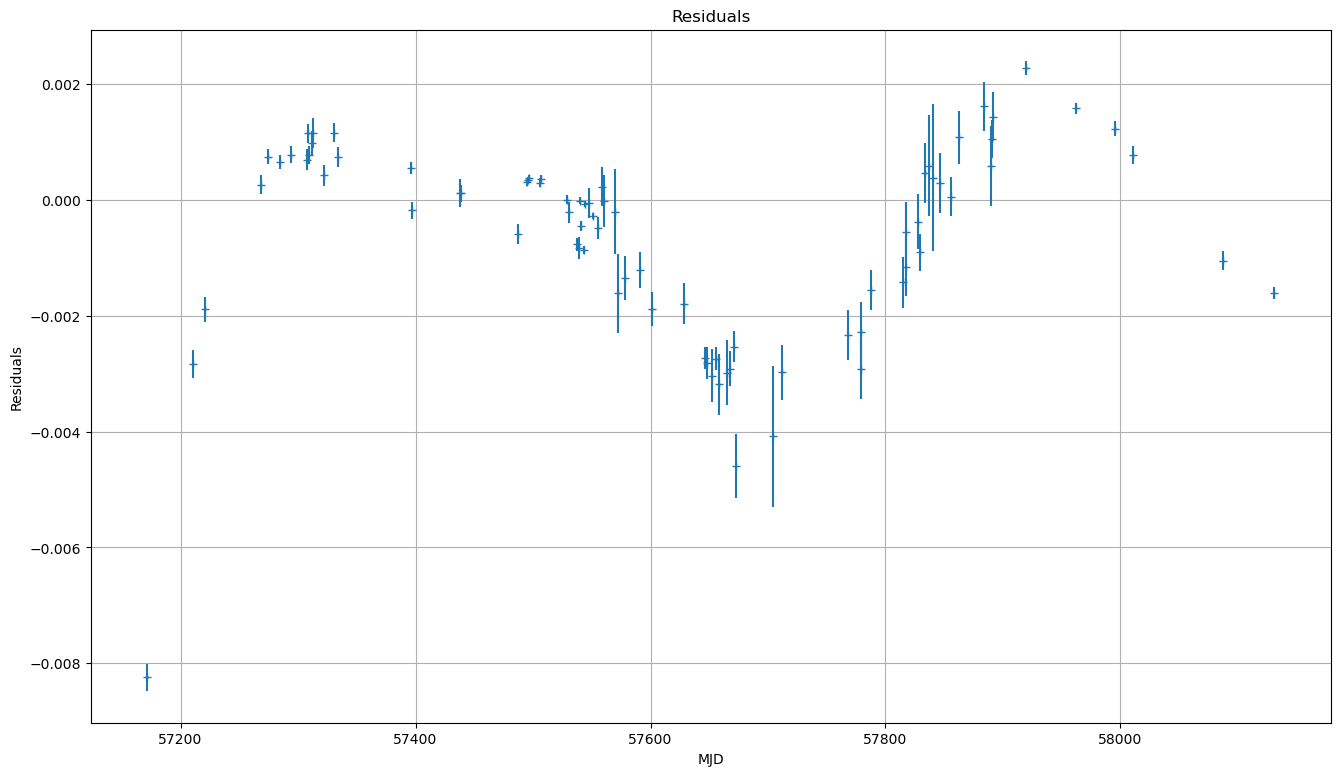

In [65]:
f = pint.fitter.WLSFitter(t, m)
f.fit_toas()
f.plot()

In [66]:
f.print_summary()

Fitted model using weighted_least_square method with 10 free parameters to 80 TOAs
Prefit residuals Wrms = 96940.60365050769 us, Postfit residuals Wrms = 1000.9784534474722 us
Chisq = 944.804 for 69 d.o.f. for reduced Chisq of 13.693

PAR                   Prefit                  Postfit            Units
============== ==================== ============================ =====
PSR                      J1709-4429 J1709-4429                   None
TRACK                            -2 -2                           None
EPHEM                         DE430 DE430                        None
CLOCK                       TT(TAI) TT(TAI)                      None
UNITS                           TDB TDB                          None
START                       57171.6                      57171.6 d 
FINISH                      58393.3                        58131 d 
DILATEFREQ                        N                              None
DMDATA                            N                              No

In [68]:
n=( f.model.F0.value)*(f.model.F2.value)/(f.model.F1.value**2)
print(n)

27.847440959792884
